In [1]:
import fsm
import numpy as np
import random_gen
from time import time
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# Symmetric SNP Data

In [12]:
gen_f = random_gen.test_f_matrix(m=10000,k = 3, density=.001,sym=True, return_np=False)
array_sparse, array_scipy = next(gen_f)
scipy_eig_value, scipy_eig_vects = eigsh(array_scipy, k=5, tol=1e-5)
scipy_eig_value

array([-18.40347743, -18.33990025,  18.30234368,  18.39315688,
        33.875248  ])

# Non - Symmetric SNP Data

In [11]:
gen_f = random_gen.test_f_matrix(m=100,n= 10000,k = 3, density=.001,sym=False, return_np=False)
array_sparse, array_scipy = next(gen_f)
square_scipy = array_scipy.T.dot(array_scipy)
print('Square Shape:, ', square_scipy.shape)
scipy_eig_value, scipy_eig_vects = eigsh(square_scipy, k=5, tol=1e-5)
scipy_eig_value

Square Shape:,  (10000, 10000)


array([118.92062389, 122.09280111, 122.90868351, 129.55016624,
       142.10682096])

In [4]:
array_scipy

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 301928 stored elements in Compressed Sparse Row format>

In [3]:
def fun(gen, num_trials, tol, num_eigen, tol_frac=.1, norm_iter=3):
    finite_dict = {}
    scipy_dict = {}
    for j in range(1,num_eigen+1):
        total_finite = 0
        total_scipy = 0
        for i in range(num_trials):
            array_sparse, array_scipy = next(gen)
            finite_eig_value, finite_eig_vects = fsm.eigen.power.peig(array_sparse, k=1, tol=tol,
                                                                      tol_frac=tol_frac, norm_iter = norm_iter)
            start = time()
            finite_eig_value, finite_eig_vects = fsm.eigen.power.peig(array_sparse, k=j, tol=tol,
                                                                      tol_frac=tol_frac, norm_iter = norm_iter)
            total_finite += time() - start
            start = time()
            scipy_eig_value, scipy_eig_vects = eigsh(array_scipy, k=j, tol=tol)
            total_scipy += time() - start
        finite_dict[j] = total_finite/num_trials
        scipy_dict[j] = total_scipy/num_trials
    return (finite_dict, scipy_dict)
    
    

# Num Eigen vs Run Time (10,000 by 10,000) Finite SNP Matrix

normalization every 3 iterations

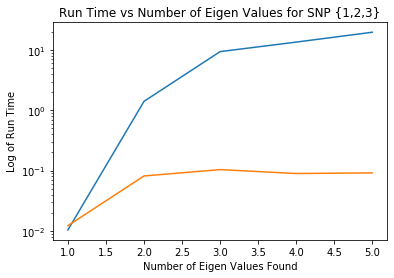

In [9]:
gen_f = random_gen.test_f_matrix(m=10000,k = 3, density=.002,sym=True, return_np=False)
finite_dict, scipy_dict = fun(gen_f, 3, 1e-5, 5)
for dct in finite_dict, scipy_dict:
    lists = sorted(dct.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
plt.title('Run Time vs Number of Eigen Values for SNP {1,2,3}')
plt.ylabel('Log of Run Time')
plt.yscale('log')
plt.xlabel('Number of Eigen Values Found')
plt.show()

# Num Eigen vs Run Time (10,000 by 10,000) Binary SNP Matrix

normalization every 3 iterations

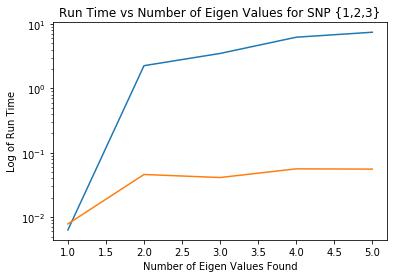

In [7]:
gen_b = random_gen.test_b_matrix(m=10000, density=.002,sym=True, return_np=False)
finite_dict, scipy_dict = fun(gen_b, 3, 1e-5, 5)
for dct in finite_dict, scipy_dict:
    lists = sorted(dct.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
plt.title('Run Time vs Number of Eigen Values for SNP {1,2,3}')
plt.ylabel('Log of Run Time')
plt.yscale('log')
plt.xlabel('Number of Eigen Values Found')
plt.show()

# Num Eigen vs Run Time (10,000 by 10,000) Binary SNP Matrix

normalization every iteration

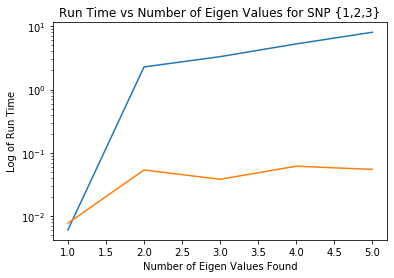

In [4]:
gen_b = random_gen.test_b_matrix(m=10000, density=.002,sym=True, return_np=False)
finite_dict, scipy_dict = fun(gen_b, 3, 1e-5, 5, norm_iter=1)
for dct in finite_dict, scipy_dict:
    lists = sorted(dct.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
plt.title('Run Time vs Number of Eigen Values for SNP {1,2,3}')
plt.ylabel('Log of Run Time')
plt.yscale('log')
plt.xlabel('Number of Eigen Values Found')
plt.show()

# Num Eigen vs Run Time (10,000 by 10,000) Binary SNP Matrix
# Block Power (Buffer = num_eigen)
normalization every iteration

In [5]:
def funb(gen, num_trials, tol, num_eigen, tol_frac=.1, norm_iter=3):
    finite_dict = {}
    scipy_dict = {}
    for j in range(1,num_eigen+1):
        total_finite = 0
        total_scipy = 0
        for i in range(num_trials):
            array_sparse, array_scipy = next(gen)
            finite_eig_value, finite_eig_vects = fsm.eigen.power.beig(array_sparse, k=j, tol=tol,
                                                                      tol_frac=tol_frac, norm_iter = norm_iter,
                                                                      buffer = j)
            start = time()
            finite_eig_value, finite_eig_vects = fsm.eigen.power.beig(array_sparse, k=j, tol=tol,
                                                                      tol_frac=tol_frac, norm_iter = norm_iter,
                                                                      buffer = j)
            total_finite += time() - start
            start = time()
            scipy_eig_value, scipy_eig_vects = eigsh(array_scipy, k=j, tol=tol)
            total_scipy += time() - start
        finite_dict[j] = total_finite/num_trials
        scipy_dict[j] = total_scipy/num_trials
    return (finite_dict, scipy_dict)

/Users/tnonet/Documents/GitHub/FSM/fsm/eigen/power.py:147: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  return np.diag(array.dot2d(vp1).T.dot(vp1))[:k], vp1[:, :k]


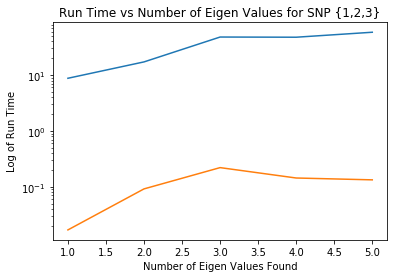

In [7]:
gen_b = random_gen.test_f_matrix(m=10000, density=.002,sym=True, return_np=False)
finite_dict, scipy_dict = funb(gen_b, 3, 1e-5, 5, norm_iter=1)
for dct in finite_dict, scipy_dict:
    lists = sorted(dct.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
plt.title('Run Time vs Number of Eigen Values for SNP {1,2,3}')
plt.ylabel('Log of Run Time')
plt.yscale('log')
plt.xlabel('Number of Eigen Values Found')
plt.show()

In [7]:
(array_scipy.data.size*array_scipy.data.itemsize +
array_scipy.indices.size*array_scipy.indices.itemsize +
array_scipy.indptr.size*array_scipy.indptr.itemsize)

12080376

In [5]:
finite_dict

{1: 0.005706071853637695}

In [6]:
array_sparse.mem

4804228

In [6]:
scipy_eig_value, scipy_eig_vects = eigsh(array_scipy, k=5, tol=1e-5)

In [17]:
finite_eig_value, finite_eig_vects = fsm.eigen.power.beig(array_sparse, k=5,
                                                          tol=1e-5, tol_frac=.1,
                                                          max_iter=10000, norm_frac=2,
                                                          norm_iter = 3)

In [18]:
finite_eig_value

array([122.52830959, -53.93492584,  53.68501426, -53.06506688,
        52.99322316])

In [19]:
scipy_eig_value

array([-53.93492584, -53.0650669 ,  52.99322319,  53.68501426,
       122.52830959])

In [2]:
from fsm.sparse.transform import TSQR
import numpy as np

In [27]:
x = np.random.rand(100,10)

In [28]:
Q = TSQR(x)

In [30]:
Q1, R = np.linalg.qr(x)


In [31]:
np.mean(np.square(Q1 - Q))

0.024673487617319436

In [32]:
np.mean(np.square(Q1))

0.010000000000000002

In [33]:
import matplotlib.pyplot as plt

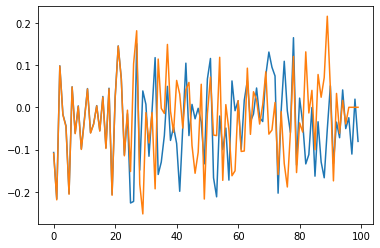

In [36]:
plt.plot(Q1[:,1])
plt.plot(-Q[:,1])